In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
stats = pd.DataFrame(columns=["name","attempted_passes","big_chances_created","big_chances_missed","clearances_blocks_interceptions","completed_passes","dribbles","errors_leading_to_goal_attempt","fixture","fouls","key_passes","minutes","offside","open_play_crosses","opponent_team","penalties_conceded","penalties_missed","penalties_saved","recoveries","red_cards","round","saves","tackled","tackles","target_missed","team_score","was_home","yellow_cards","shots_on_target", "season"])
test = pd.DataFrame(columns=["name","attempted_passes","big_chances_created","big_chances_missed","clearances_blocks_interceptions","completed_passes","dribbles","errors_leading_to_goal_attempt","fixture","fouls","key_passes","minutes","offside","open_play_crosses","opponent_team","penalties_conceded","penalties_missed","penalties_saved","recoveries","red_cards","round","saves","tackled","tackles","target_missed","team_score","was_home","yellow_cards","shots_on_target", "season"])
seasonstart = [16, 17, 18]
for i in seasonstart:
    for j in range(38):
        statsgw = pd.read_csv("Parsed_20" + str(i) + "_" + str(i+1) + "/gwgames/gw" + str(j+1) + ".csv")
        statsgw["season"] = i
        if i == 18:
            test = test.append(statsgw, ignore_index=True)
        else:
            stats = stats.append(statsgw, ignore_index=True)
#stats = pd.read_csv("Parsed_2016_17/gwgames/gw1.csv")
stats = stats.drop(columns=["minutes", "opponent_team"])
test = test.drop(columns=["minutes", "opponent_team"])

In [3]:
#stats.describe()
#stats.tail(10)
allnames = pd.DataFrame({"name":stats["name"].append(test["name"]),
                          "teamid":0})
allnames["name"] = pd.Categorical(allnames["name"])
allnames["teamid"] = allnames.name.cat.codes
names = {}
for index, row in allnames.iterrows():
    if not row["name"] in names.keys():
        names[row["name"]] = row["teamid"]
stats["teamid"] = -1
for i in range(stats.shape[0]):
    stats['teamid'].loc[i] = int(names.get(stats["name"].loc[i]))
    
test["teamid"] = -1
for i in range(test.shape[0]):
    test["teamid"].loc[i] = int(names.get(test["name"].loc[i]))

#for index, row in test.iterrows():
#    row["teamid"] = names.get(row["name"])
stats = stats.drop(columns=["name"])
test = test.drop(columns=["name"])
#stats.head()
stats.head()

C:\Users\Rasmus\Miniconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,attempted_passes,big_chances_created,big_chances_missed,clearances_blocks_interceptions,completed_passes,dribbles,errors_leading_to_goal_attempt,fixture,fouls,key_passes,...,saves,tackled,tackles,target_missed,team_score,was_home,yellow_cards,shots_on_target,season,teamid
0,351,0,0,49,262,3,0,10,16,4,...,4,19,18,2,1,0,2,3,16,25
1,357,0,1,61,261,8,0,3,10,9,...,3,16,16,4,1,1,0,6,16,7
2,485,0,1,36,385,8,0,8,13,6,...,3,23,8,3,3,1,3,5,16,1
3,303,0,0,51,194,8,0,7,12,4,...,6,13,15,4,1,0,2,1,16,23
4,559,0,0,19,481,16,0,10,16,11,...,2,26,10,6,2,1,5,6,16,5


In [4]:
labels = stats["team_score"].astype(int)
features = stats.drop(columns=["team_score"]).astype(int)

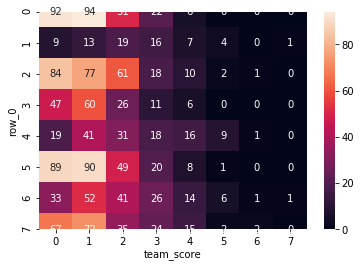

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=8, random_state=42).fit_predict(features)
cross = pd.crosstab(model,labels)
#cross = pd.crosstab(labels, labels)
sns.heatmap(cross,annot=True,annot_kws={"size":10})
plt.show()

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 35
KNNmodel = KNeighborsClassifier(n_neighbors=neighbors).fit(features, labels)

In [7]:
from sklearn.svm import SVC
SVCmodel = SVC(gamma="scale").fit(features, labels)

In [8]:
from sklearn.tree import DecisionTreeClassifier
DTCmodel = DecisionTreeClassifier(random_state=42).fit(features, labels)

In [9]:
from sklearn.ensemble import RandomForestClassifier
x = 10
RFCmodel = RandomForestClassifier(max_depth=x, random_state=42, n_estimators=10).fit(features, labels)

In [10]:
from sklearn.neural_network import MLPClassifier
MLPmodel = MLPClassifier(hidden_layer_sizes=30).fit(features, labels)

In [11]:
KNNpredicted = KNNmodel.predict(test.drop(columns="team_score"))
SVCpredicted = SVCmodel.predict(test.drop(columns="team_score"))
DTCpredicted = DTCmodel.predict(test.drop(columns="team_score"))
RFCpredicted = RFCmodel.predict(test.drop(columns="team_score"))
MLPpredicted = MLPmodel.predict(test.drop(columns="team_score"))
KNNright = 0
SVCright = 0
DTCright = 0
RFCright = 0
MLPright = 0
all = 0
for i in range(len(KNNpredicted)):
    if KNNpredicted[i] == test["team_score"].loc[i]:
        KNNright += 1
    if SVCpredicted[i] == test["team_score"].loc[i]:
        SVCright += 1
    if DTCpredicted[i] == test["team_score"].loc[i]:
        DTCright += 1
    if RFCpredicted[i] == test["team_score"].loc[i]:
        RFCright += 1
    if MLPpredicted[i] == test["team_score"].loc[i]:
        MLPright += 1
    all += 1
KNNacc = KNNright/all
SVCacc = SVCright/all
DTCacc = DTCright/all
RFCacc = RFCright/all
MLPacc = MLPright/all

[KNNacc, SVCacc, DTCacc, RFCacc, MLPacc]

[0.3157894736842105,
 0.3131578947368421,
 0.3881578947368421,
 0.3973684210526316,
 0.40131578947368424]

In [12]:
predictions = pd.DataFrame(columns=["fixture", "home_predict", "away_predict", "home_actual", "away_actual"])
for i in range(test.shape[0]):
    if int(test["was_home"].iloc[i]) == 1:
        fixture = int(test["fixture"].iloc[i])
        home_predict = int(RFCpredicted[i])
        home_actual = int(test["team_score"].iloc[i])
        away_predict = -1
        away_actual = -1
        for j in range(test.shape[0]):
            if fixture == test["fixture"].iloc[j] and int(test["was_home"].iloc[j]) == 0:
                away_predict = int(RFCpredicted[j])
                away_actual = int(test["team_score"].iloc[j])
                break
        predictions = predictions.append({"fixture": fixture, 
                                          "home_predict": home_predict, 
                                          "away_predict": away_predict, 
                                          "home_actual": home_actual, 
                                          "away_actual": away_actual}, ignore_index=True)
        
predictions["actual_result"] = -1
for i in range(predictions.shape[0]):
    if predictions["home_actual"].iloc[i] > predictions["away_actual"].iloc[i]:
        predictions["actual_result"].loc[i] = 1
    elif predictions["home_actual"].iloc[i] < predictions["away_actual"].iloc[i]:
        predictions["actual_result"].loc[i] = 2
    else:
        predictions["actual_result"].loc[i] = 0
predictions.drop(columns=["home_actual", "away_actual"])

C:\Users\Rasmus\Miniconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,fixture,home_predict,away_predict,actual_result
0,4,0,0,2
1,1,0,1,2
2,9,1,0,1
3,3,2,0,2
4,10,1,0,0
...,...,...,...,...
375,375,2,1,0
376,377,3,2,2
377,378,1,1,0
378,379,2,0,0


In [13]:
all = predictions.shape[0]
right = 0
for idx, row in predictions.iterrows():
    home = predictions.loc[idx,'home_predict']
    away = predictions.loc[idx,'away_predict']
    actual = predictions.loc[idx,'actual_result']
    if (home == away and actual == 0) or (home < away and actual == 2) or (home > away and actual == 1):
        right += 1
right/all

0.5815789473684211

In [14]:
gamestats = pd.DataFrame(columns=['name_h','attempted_passes_h','big_chances_created_h','big_chances_missed_h','clearances_blocks_interceptions_h','completed_passes_h','dribbles_h','errors_leading_to_goal_attempt_h','fixture_h','fouls_h','key_passes_h','minutes_h','offside_h','open_play_crosses_h','opponent_team_h','penalties_conceded_h','penalties_missed_h','penalties_saved_h','recoveries_h','red_cards_h','round_h','saves_h','tackled_h','tackles_h','target_missed_h','team_score_h','yellow_cards_h','shots_on_target_h','name_a','attempted_passes_a','big_chances_created_a','big_chances_missed_a','clearances_blocks_interceptions_a','completed_passes_a','dribbles_a','errors_leading_to_goal_attempt_a','fouls_a','key_passes_a','offside_a','open_play_crosses_a','penalties_conceded_a','penalties_missed_a','penalties_saved_a','recoveries_a','red_cards_a','saves_a','tackled_a','tackles_a','target_missed_a','team_score_a','yellow_cards_a','shots_on_target_a'])
gametest = pd.DataFrame(columns=['name_h','attempted_passes_h','big_chances_created_h','big_chances_missed_h','clearances_blocks_interceptions_h','completed_passes_h','dribbles_h','errors_leading_to_goal_attempt_h','fixture_h','fouls_h','key_passes_h','minutes_h','offside_h','open_play_crosses_h','opponent_team_h','penalties_conceded_h','penalties_missed_h','penalties_saved_h','recoveries_h','red_cards_h','round_h','saves_h','tackled_h','tackles_h','target_missed_h','team_score_h','yellow_cards_h','shots_on_target_h','name_a','attempted_passes_a','big_chances_created_a','big_chances_missed_a','clearances_blocks_interceptions_a','completed_passes_a','dribbles_a','errors_leading_to_goal_attempt_a','fouls_a','key_passes_a','offside_a','open_play_crosses_a','penalties_conceded_a','penalties_missed_a','penalties_saved_a','recoveries_a','red_cards_a','saves_a','tackled_a','tackles_a','target_missed_a','team_score_a','yellow_cards_a','shots_on_target_a'])
seasonstart = [16, 17, 18]
for i in seasonstart:
    for j in range(38):
        statsgw = pd.read_csv("Parsed_20" + str(i) + "_" + str(i+1) + "/gwgamesStats/gw" + str(j+1) + ".csv")
        statsgw["season"] = i
        if i == 18:
            gametest = gametest.append(statsgw, ignore_index=True)
        else:
            gamestats = gamestats.append(statsgw, ignore_index=True)
#stats = pd.read_csv("Parsed_2016_17/gwgames/gw1.csv")
gamestats = gamestats.drop(columns=["minutes_h", "opponent_team_h", 'penalties_conceded_h', 'penalties_conceded_a'])
gametest = gametest.drop(columns=["minutes_h", "opponent_team_h", 'penalties_conceded_h', 'penalties_conceded_a'])
pd.set_option('display.max_columns', 55)
gametest.head()

C:\Users\Rasmus\Miniconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,attempted_passes_a,attempted_passes_h,big_chances_created_a,big_chances_created_h,big_chances_missed_a,big_chances_missed_h,clearances_blocks_interceptions_a,clearances_blocks_interceptions_h,completed_passes_a,completed_passes_h,dribbles_a,dribbles_h,errors_leading_to_goal_attempt_a,errors_leading_to_goal_attempt_h,fixture_h,fouls_a,fouls_h,key_passes_a,key_passes_h,name_a,name_h,offside_a,offside_h,open_play_crosses_a,open_play_crosses_h,penalties_missed_a,penalties_missed_h,penalties_saved_a,penalties_saved_h,recoveries_a,recoveries_h,red_cards_a,red_cards_h,round_h,saves_a,saves_h,season,shots_on_target_a,shots_on_target_h,tackled_a,tackled_h,tackles_a,tackles_h,target_missed_a,target_missed_h,team_score_a,team_score_h,yellow_cards_a,yellow_cards_h
0,659,370,2,1,1,1,31,35,582,279,20,7,0,0,4,8,9,9,5,Chelsea,Huddersfield Town,1,2,3,4,0,0,0,0,60,72,0,0,1,1,1,18.0,4,1,27,12,6,17,3,4,3,0,1,2
1,553,399,0,0,2,1,24,40,467,319,11,6,1,1,1,14,11,9,9,Manchester City,Arsenal,2,7,0,1,0,0,0,0,59,64,0,0,1,3,6,18.0,8,3,22,6,5,9,5,4,2,0,2,2
2,389,438,0,2,0,2,47,22,299,330,10,11,0,0,9,16,10,5,13,Brighton,Watford,3,0,3,4,0,0,0,0,69,75,0,0,1,3,0,18.0,0,5,17,18,8,9,5,9,0,2,2,2
3,352,670,2,0,1,0,49,36,259,589,14,9,0,0,3,11,9,8,10,Crystal Palace,Fulham,3,2,2,6,0,0,0,0,67,67,0,0,1,6,7,18.0,9,6,24,18,10,17,0,4,2,0,2,1
4,410,547,1,2,0,1,40,33,305,454,3,11,0,1,10,7,8,4,5,Everton,Wolves,3,2,1,5,0,0,0,0,50,55,1,0,1,2,3,18.0,5,4,12,22,9,5,1,5,2,2,1,0


In [15]:
allnames = pd.DataFrame({"name":gamestats["name_h"].append(gametest["name_h"]),
                          "teamid":0})
allnames["name"] = pd.Categorical(allnames["name"])
allnames["teamid"] = allnames.name.cat.codes
names = {}
for index, row in allnames.iterrows():
    if not row["name"] in names.keys():
        names[row["name"]] = row["teamid"]

gamestats["teamid_h"] = -1
gamestats["teamid_a"] = -1
for i in range(gamestats.shape[0]):
    gamestats['teamid_h'].loc[i] = int(names.get(gamestats["name_h"].iloc[i]))
    gamestats['teamid_a'].loc[i] = int(names.get(gamestats["name_a"].iloc[i]))
    
gametest["teamid_h"] = -1
gametest["teamid_a"] = -1
for i in range(gametest.shape[0]):
    gametest["teamid_h"].loc[i] = int(names.get(gametest["name_h"].iloc[i]))
    gametest["teamid_a"].loc[i] = int(names.get(gametest["name_a"].iloc[i]))

#for index, row in test.iterrows():
#    row["teamid"] = names.get(row["name"])
gamestats = gamestats.drop(columns=["name_h", "name_a"])
gametest = gametest.drop(columns=["name_h", "name_a"])
#stats.head()


In [16]:
gamestats.head()

,attempted_passes_a,attempted_passes_h,big_chances_created_a,big_chances_created_h,big_chances_missed_a,big_chances_missed_h,clearances_blocks_interceptions_a,clearances_blocks_interceptions_h,completed_passes_a,completed_passes_h,dribbles_a,dribbles_h,errors_leading_to_goal_attempt_a,errors_leading_to_goal_attempt_h,fixture_h,fouls_a,fouls_h,key_passes_a,key_passes_h,offside_a,offside_h,open_play_crosses_a,open_play_crosses_h,penalties_missed_a,penalties_missed_h,penalties_saved_a,penalties_saved_h,recoveries_a,recoveries_h,red_cards_a,red_cards_h,round_h,saves_a,saves_h,season,shots_on_target_a,shots_on_target_h,tackled_a,tackled_h,tackles_a,tackles_h,target_missed_a,target_missed_h,team_score_a,team_score_h,yellow_cards_a,yellow_cards_h,teamid_h,teamid_a
0,485,357,0,0,1,1,35,61,387,261,12,8,1,0,3,14,10,8,9,0,5,3,1,0,0,0,0,39,55,0,0,1,5,3,16.0,4,6,26,16,8,16,4,4,1,1,0,0,7,17
1,481,485,2,0,0,1,32,36,382,385,11,8,0,0,8,17,13,13,6,3,4,3,5,0,1,1,0,50,53,0,0,1,2,3,16.0,7,5,21,23,9,8,3,3,4,3,3,3,1,12
2,351,559,0,0,0,0,49,19,262,481,3,16,0,0,10,16,16,4,11,1,1,0,2,0,0,0,0,64,62,0,0,1,4,2,16.0,3,6,19,26,18,10,2,6,1,2,2,5,5,25
3,450,448,2,0,3,0,22,53,346,340,10,7,1,1,4,17,8,11,5,0,1,0,0,0,0,0,0,74,64,0,0,1,3,4,16.0,5,5,20,14,9,14,9,7,1,2,2,2,10,11
4,421,353,0,1,0,1,30,38,330,262,17,10,0,0,6,14,18,8,8,2,1,2,3,0,0,0,0,49,46,0,0,1,1,0,16.0,1,2,17,16,11,8,9,6,1,1,5,3,15,19


In [17]:
names

{'Everton': 7,
 'Arsenal': 1,
 'Chelsea': 5,
 'Hull City': 10,
 'Middlesbrough': 15,
 'AFC Bournemouth': 0,
 'Manchester City': 13,
 'Southampton': 18,
 'Burnley': 3,
 'Crystal Palace': 6,
 'West Ham United': 25,
 'Watford': 23,
 'Sunderland': 20,
 'Leicester City': 11,
 'Norwich City': 17,
 'Manchester United': 14,
 'Swansea City': 21,
 'West Bromwich Albion': 24,
 'Stoke City': 19,
 'Liverpool': 12,
 'Newcastle United': 16,
 'Brighton': 2,
 'Huddersfield Town': 9,
 'Tottenham': 22,
 'Fulham': 8,
 'Wolves': 26,
 'Cardiff City': 4}

In [18]:
trainfeatures = gamestats.drop(columns=["team_score_h", "team_score_a"])
trainlabels = pd.DataFrame()
for i in range(gamestats.shape[0]):
    if int(gamestats["team_score_h"].iloc[i]) < int(gamestats["team_score_a"].iloc[i]):
        trainlabels = trainlabels.append([2], ignore_index=True)
    elif int(gamestats["team_score_h"].iloc[i]) == int(gamestats["team_score_a"].iloc[i]):
        trainlabels = trainlabels.append([0], ignore_index=True)
    elif int(gamestats["team_score_h"].iloc[i]) > int(gamestats["team_score_a"].iloc[i]):
        trainlabels = trainlabels.append([1], ignore_index=True)
trainlabels

,0
0,0
1,2
2,1
3,1
4,0
...,...
755,1
756,1
757,2
758,2


In [19]:
testlabels = pd.DataFrame()
for i in range(gametest.shape[0]):
    if int(gametest["team_score_h"].iloc[i]) < int(gametest["team_score_a"].iloc[i]):
        testlabels = testlabels.append([2], ignore_index=True)
    elif int(gametest["team_score_h"].iloc[i]) == int(gametest["team_score_a"].iloc[i]):
        testlabels = testlabels.append([0], ignore_index=True)
    elif int(gametest["team_score_h"].iloc[i]) > int(gametest["team_score_a"].iloc[i]):
        testlabels = testlabels.append([1], ignore_index=True)
testlabels

,0
0,2
1,2
2,1
3,2
4,0
...,...
375,0
376,2
377,0
378,0


In [20]:
neighbors = 10
KNNgamemodel = KNeighborsClassifier(n_neighbors=neighbors).fit(trainfeatures, trainlabels)
SVCgamemodel = SVC(gamma="scale").fit(trainfeatures, trainlabels)
DTCgamemodel = DecisionTreeClassifier(random_state=42).fit(trainfeatures, trainlabels)
x = 15
RFCgamemodel = RandomForestClassifier(max_depth=x, random_state=42, n_estimators=10).fit(trainfeatures, trainlabels)
MLPgamemodel = MLPClassifier(hidden_layer_sizes=26).fit(trainfeatures, trainlabels)

C:\Users\Rasmus\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rasmus\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, 

In [21]:
KNNpredicted = KNNgamemodel.predict(gametest.drop(columns=["team_score_h", "team_score_a"]))
SVCpredicted = SVCgamemodel.predict(gametest.drop(columns=["team_score_h", "team_score_a"]))
DTCpredicted = DTCgamemodel.predict(gametest.drop(columns=["team_score_h", "team_score_a"]))
RFCpredicted = RFCgamemodel.predict(gametest.drop(columns=["team_score_h", "team_score_a"]))
MLPpredicted = MLPgamemodel.predict(gametest.drop(columns=["team_score_h", "team_score_a"]))

def percent(predictions, labels):
    right = 0
    for i in range(len(predictions)):
        if predictions[i] == int(labels.iloc[i]):
            right += 1
    return right/len(predictions)

[percent(KNNpredicted, testlabels), percent(SVCpredicted, testlabels), percent(DTCpredicted, testlabels), percent(RFCpredicted, testlabels), percent(MLPpredicted, testlabels)]

[0.4789473684210526,
 0.5342105263157895,
 0.5368421052631579,
 0.6236842105263158,
 0.6526315789473685]

In [31]:
KNNgamemodel.coef_

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

In [25]:
totalbest

6.113157894736843